### Basic example on the MNIST data set

In [1]:
!pip install -r requirements.txt

In [2]:
from src.EasyNN import FeedForwardNeuralNetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder

In [3]:
#Example with MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')

X = X / 255.0 #Must normalize pixels

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# one hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))


x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train_onehot)

#For accuracy score
y_test_labels = y_test.astype(int)

In [4]:
model = FeedForwardNeuralNetwork(x_train,y_train,"cross_entropy",0.001,10)

model.add_hidden_layer(1,254,"relu")
model.add_hidden_layer(2,128,"relu")
model.add_hidden_layer(3,64,"relu")
model.add_output_layer(10,"softmax")

loss = model.train()

Accuracy on epoch 1 :  0.8919464285714286
Loss <function cross_entropy at 0x7f5f09189260> on epoch 1:  0.35996186291977994
Accuracy on epoch 2 :  0.9484285714285714
Loss <function cross_entropy at 0x7f5f09189260> on epoch 2:  0.1718174904037566
Accuracy on epoch 3 :  0.9627678571428572
Loss <function cross_entropy at 0x7f5f09189260> on epoch 3:  0.12279313048670795
Accuracy on epoch 4 :  0.9704107142857142
Loss <function cross_entropy at 0x7f5f09189260> on epoch 4:  0.09525618213397463
Accuracy on epoch 5 :  0.9763214285714286
Loss <function cross_entropy at 0x7f5f09189260> on epoch 5:  0.0763644969559724
Accuracy on epoch 6 :  0.9813571428571428
Loss <function cross_entropy at 0x7f5f09189260> on epoch 6:  0.06066454953826035
Accuracy on epoch 7 :  0.9848214285714286
Loss <function cross_entropy at 0x7f5f09189260> on epoch 7:  0.05101843926178269
Accuracy on epoch 8 :  0.9864464285714286
Loss <function cross_entropy at 0x7f5f09189260> on epoch 8:  0.042868902722549736
Accuracy on epoch

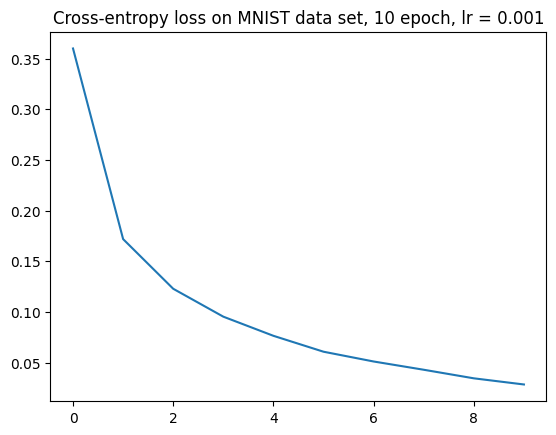

In [9]:
plt.figure()
plt.plot([i for i in range(len(loss))], loss)
plt.title("Cross-entropy loss on MNIST data set, 10 epoch, lr = 0.001")
plt.show()

In [10]:
#Accuracy on test set

pred_prob = model.predict_prob(x_test)
pred = np.array([np.argmax(p, axis=0)[0] for p in pred_prob])

accuracy = accuracy_score(y_test_labels, pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9747857142857143


In [11]:
#save the model
model.save_param("mnist_ffnn")

Weights properly saved as mnist_ffnn.pkl


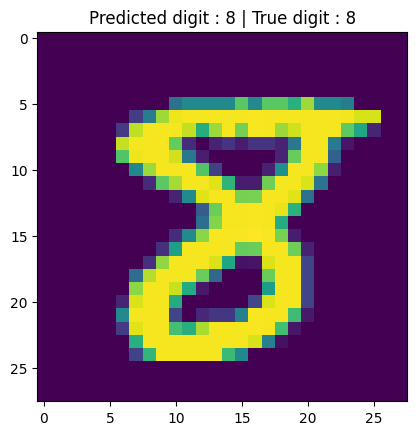

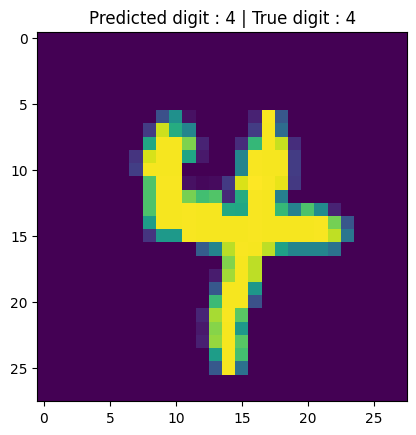

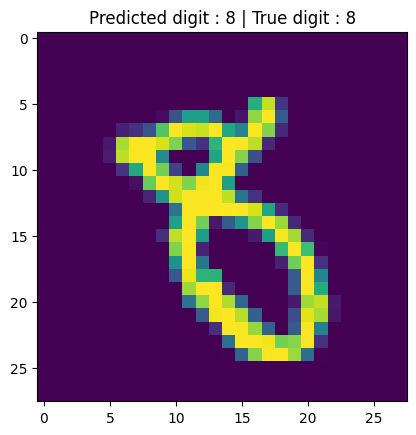

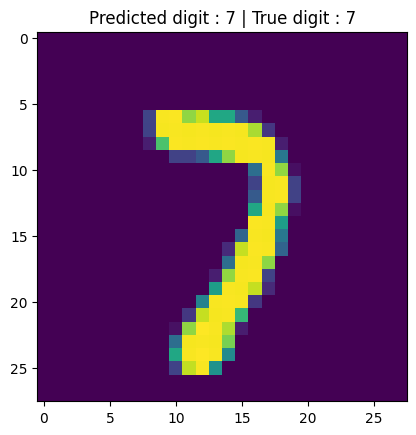

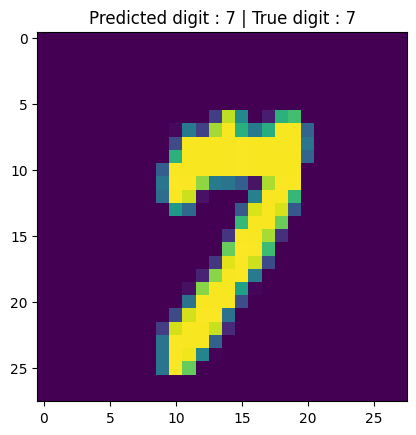

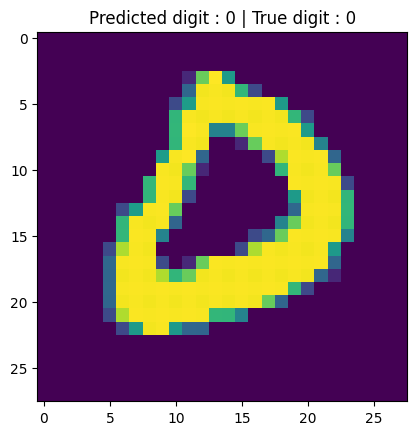

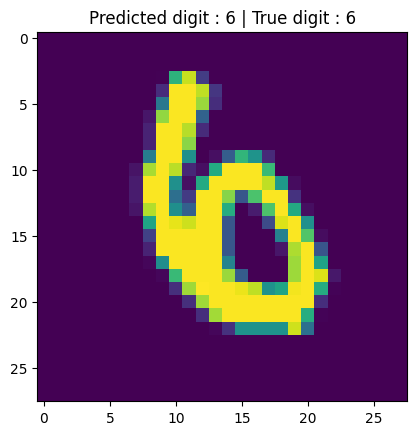

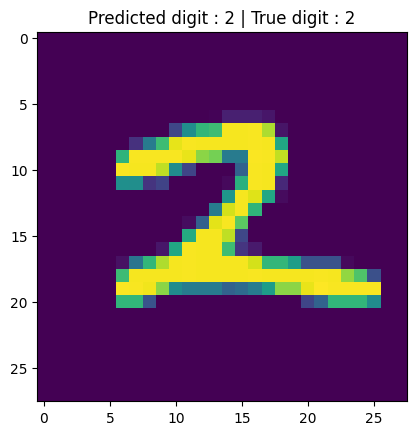

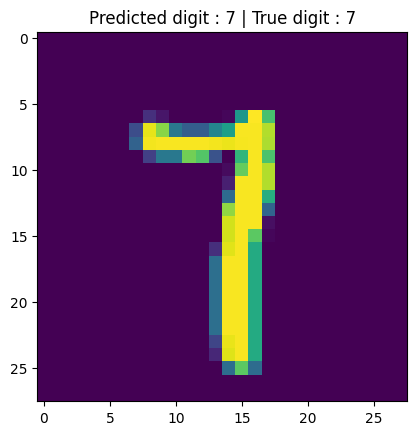

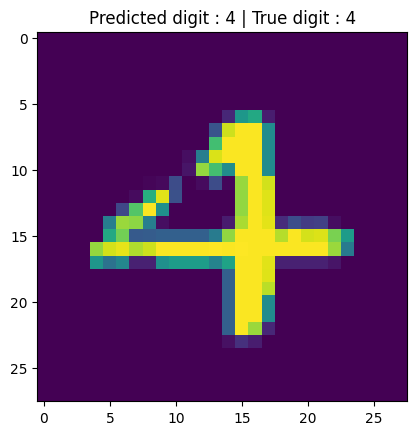

In [12]:
#Some examples
for i in range(10):
    plt.figure()
    im_true = x_test.iloc[i,:].to_numpy().reshape(28,28)
    im_pred = pred[i]
    true_digit = y_test_labels[i]

    plt.imshow(im_true)
    plt.title(f"Predicted digit : {im_pred} | True digit : {true_digit}")